<h1 style="text-align:center;color:#E50914;">FlixShield: Netflix Recommendation System and Content Analysis</h1>



<img src="netflix_image.jpg" alt="Netflix_image" width="1000" height="200" allign="center"/>


# Project Aim : 
This project aims to analyze the Netflix Dataset of movies and TV shows up to 2021. The goal is to develop a <strong>content-based recommendation system</strong> by grouping the content into relevant clusters using NLP techniques. The system will enhance user experience by suggesting personalized content.

Further, the dataset will be analyzed to uncover insights and trends in the streaming entertainment industry, followed by hypothesis testing to validate these findings.

## The project was conducted through the following data science workflow:

## 1. Data Preprocessing:

Imputed missing values in the dataset.
Transformed nested columns (director, cast, listed_in, country) to facilitate effective data visualization and analysis.
Discretized the rating attribute into categorical bins (e.g., adult, children's, family-friendly, not rated).

## 2.Exploratory Data Analysis (EDA):

We conducted EDA to extract meaningful insights and identify patterns that could contribute to reducing subscriber churn.

## 3.Feature Engineering and Vectorization:
Engineered features by tokenizing and preprocessing textual attributes such as director, cast, country, genre, rating, and description.
Applied TF-IDF vectorization to convert these text-based features into numerical representations suitable for modeling.

## 4. Dimensionality Reduction:

Implemented Principal Component Analysis (PCA) to reduce the dimensionality of the dataset, enhancing computational efficiency.

## 5. Clustering:

Utilized K-Means Clustering and Agglomerative Hierarchical Clustering algorithms to segment the content into clusters.
Determined the optimal number of clusters (4 for K-Means, 2 for Hierarchical Clustering) using appropriate evaluation metrics.

## 6. Recommender System Development:

Developed a content-based recommendation system by leveraging a cosine similarity matrix to generate personalized recommendations.
Aimed to enhance user engagement and mitigate subscriber churn for Netflix.

# Importing Important Libraries...

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import pylab as pl
import spacy
import sklearn
import spacy
import en_core_web_sm
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet
#!pip install nltk
import nltk
#!python3 -c "import nltk; nltk.download('all')"

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD

#stop-words
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler


# Importing libraries for clustering
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\daven\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import pandas as pd

# 1. About Dataset

In [4]:
netflix_df=pd.read_csv('netflix_movies_tv_shows_data.csv')
netflix=netflix_df.copy()
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [22]:
print(netflix_df[netflix_df['show_id']=='s5']['cast'].iloc[0])



Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar


In [5]:
df_temp=pd.read_csv('netflix_movies_tv_shows_data.csv')

In [8]:
# Dataset Rows & Columns count
print("No. of Rows : ",netflix_df.shape[0])
print("No. of Columns : ",netflix_df.shape[1])


No. of Rows :  8807
No. of Columns :  12


In [9]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [10]:
netflix_df.shape

(8807, 12)

In [11]:
netflix_df.duplicated().sum()

0

No duplicates are present.

# 2. About Features

In [14]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

The variable description of the Netflix Movies and TV Shows Clustering Dataset is as follows:

1. **show_id**: Unique identifier for each movie/show.

2. **type**: Indicates whether the entry is a movie or a TV show.
3. **title**: Name of the movie or TV show.
4. **director**: Name of the director(s) of the movie or TV show.
5. **cast**: Names of the actors and actresses featured in the movie or TV show.
6. **country**: Country or countries where the movie or TV show was produced.
7. **date_added**: Date when the movie or TV show was added to Netflix.
8. **release_year**: Year when the movie or TV show was released.
9. **rating**: TV rating or movie rating of the movie or TV show.
10. **duration**: Length of the movie or TV show in minutes or seasons.
11. **listed_in**: Categories or genres of the movie or TV show.
12. **description**: Brief synopsis or summary of the movie or TV show.

# 3. Data Wrangling

In [28]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## 3.1 Handling Missing Values

In [18]:
# Percentage of null values in each category
null_count_by_variable = netflix_df.isnull().sum()/(netflix_df.shape[0])*100
print(null_count_by_variable)


show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64


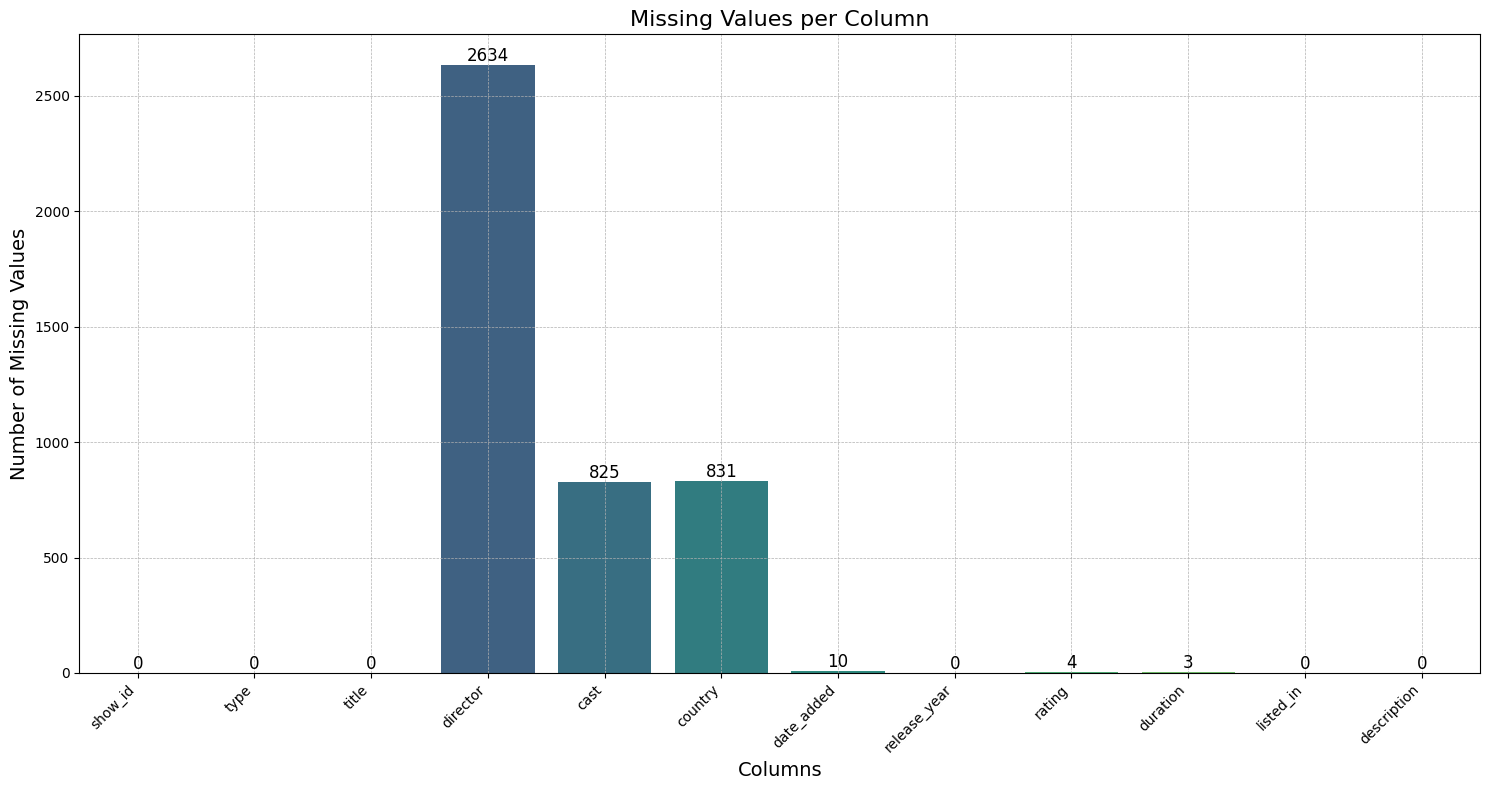

In [19]:
# Create the figure and axis
plt.figure(figsize=(15, 8))

# Calculate the number of missing values in each column
missing_values = netflix_df.isna().sum()

# Plot the missing values as a barplot
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")

# Customize the plot
plt.title('Missing Values per Column', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Number of Missing Values', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', linewidth=0.5)

# Annotate each bar with the number of missing values
for i in range(missing_values.shape[0]):
    plt.text(i, missing_values[i] + 0.5, f'{missing_values[i]}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


Since 'date_added' and 'rating' has very less percentage of null count so we can drop those observations to avoid any biasness in our clustering model.
We cannot drop or impute any values in 'director' and 'cast' as the null percentage is comparatevely high and we do not know data of those actual movie/TV shows, so its better to replace those entries with 'unknown'.
We can fill null values of 'country' with mode as we only have 6% null values and most of the movies/shows are from US only.

1. Handling Minimal Nulls in date_added and rating : Given the minimal percentage of missing values in the date_added and rating columns, we can confidently drop these observations. This approach ensures that our clustering model remains unbiased without the risk of introducing inaccuracies from imputation.

2. Dealing with High Null Percentages in director and cast: For columns like director and cast, where the null percentage is significantly higher, removing or imputing values could result in substantial data loss or misrepresentation. Instead, we will replace these missing entries with 'unknown', preserving the integrity of the dataset while acknowledging the absence of specific details.

3. Imputing Missing Values in country with Mode: The country column has about 9.4% missing values, which is relatively low.Here we will impute the missing values with the mode. This choice maintains the dataset's consistency while leveraging the dominant data trend.

In [22]:
# Imputing null value as per our discussion
# imputing with unknown in null values of director and cast feature
netflix_df[['director','cast']]=netflix_df[['director','cast']].fillna("Unknown")

# Imputing null values of country with Mode
netflix_df['country']=netflix_df['country'].fillna(netflix_df['country'].mode()[0])

# Dropping remaining null values of date_added and rating
netflix_df.dropna(axis=0, inplace=True)

In [23]:
netflix_df.shape

(8790, 12)

In [24]:
netflix_df_copy=netflix_df.copy()
netflix_df_copy.head() # maintain a copy of dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 3.2 Handling nested columns i.e 'director', 'cast', 'listed_in' and 'country'

In [30]:
# Let's create a copy of dataframe and unnest the original one
df_new=netflix_df.copy()
df_new.shape

(8807, 12)

In [31]:
df_new.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000



below 

Unnesting the 'Directors' column: The code takes the director column from the DataFrame df, splits the comma-separated values into a list, and then unnests (expands) this list into individual rows, resulting in a new DataFrame df1 where each row corresponds to a single director associated with a movie or TV show.

In [44]:

# Unnesting 'Directors' column
dir_constraint=netflix_df['director'].apply(lambda x: str(x).split(', ')).tolist()
df1 = pd.DataFrame(dir_constraint, index = netflix_df['title'])
df1 = df1.stack()
df1 = pd.DataFrame(df1.reset_index())
df1.rename(columns={0:'Directors'},inplace=True)
df1 = df1.drop(['level_1'],axis=1)
df1.sample(10)


,title,Directors
1877,Paranormal,nan
8942,The Bill Murray Stories: Life Lessons Learned ...,Tommy Avallone
5634,Kingdom of Us,Lucy Cohen
7524,Haywire,Steven Soderbergh
858,Downton Abbey,nan
3909,Misaeng,nan
2812,The Victims' Game,Chen Kuan-chung
193,The Interview,Evan Goldberg
7771,Kaleidoscope,Rupert Jones
5309,I Am not an Easy Man,Eleonore Pourriat


In [46]:
# Unnesting 'cast' column
cast_constraint=netflix_df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df2 = pd.DataFrame(cast_constraint, index = netflix_df['title'])
df2 = df2.stack()
df2 = pd.DataFrame(df2.reset_index())
df2.rename(columns={0:'Actors'},inplace=True)
df2 = df2.drop(['level_1'],axis=1)
df2.sample(10)

,title,Actors
42549,Tokyo Trial,Stephen McHattie
49396,El Barco,Patricia Arbúes
43567,Cyborg 009 VS Devilman,Tony Azzolino
52182,In The Deep,Matthew Modine
46663,Beneath the Leaves,Tommy Kijas
10229,How to Be Really Bad,Amina Merai
4762,Charlie's Angels,Crispin Glover
35032,Harishchandrachi Factory,Atharva Karve
42691,Back to 1989,Mini Tsai
46409,Basic Instinct,Daniel von Bargen


In [48]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [50]:
# Unnesting 'listed_in' column
listed_constraint=netflix_df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df3 = pd.DataFrame(listed_constraint, index = netflix_df['title'])
df3 = df3.stack()
df3 = pd.DataFrame(df3.reset_index())
df3.rename(columns={0:'Genre'},inplace=True)
df3 = df3.drop(['level_1'],axis=1)
df3.sample(10)

,title,Genre
12503,Growing Up Wild,Documentaries
11064,Come Sunday,Dramas
16029,"Lady, la vendedora de rosas",TV Dramas
6553,Chronically Metropolitan,Comedies
17667,Sleeping with Other People,Comedies
11924,The Saint,Action & Adventure
2470,Magical Andes,Docuseries
9870,Age of Tanks,Science & Nature TV
15241,Hadi İnşallah,Comedies
4557,Her Mother's Killer,Spanish-Language TV Shows


In [52]:


# Unnesting 'country' column
country_constraint=netflix_df['country'].apply(lambda x: str(x).split(', ')).tolist()
df4 = pd.DataFrame(country_constraint, index = netflix_df['title'])
df4 = df4.stack()
df4 = pd.DataFrame(df4.reset_index())
df4.rename(columns={0:'Country'},inplace=True)
df4 = df4.drop(['level_1'],axis=1)
df4.sample(10)

,title,Country
5058,Bill Hicks: Sane Man,United States
1000,Dirty John,United States
3479,Amit Tandon: Family Tandoncies,India
594,Rock the Kasbah,United States
7517,Beneath the Leaves,United States
9941,Tattah,Egypt
1800,Still Game,United Kingdom
9640,Santa Claws,United States
6193,Jerry Seinfeld: Comedian,United States
8283,God's Own Country,United Kingdom


Merging all the unnested dataframes

In [58]:
df3.head()

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


temp = df2.head().merge(df3.head(),on=['title'],how='inner')

In [65]:
## Merging all the unnested dataframes
# Merging director and cast
df5 = df2.merge(df1,on=['title'],how='inner')

# Merging listed_in with merged of (director and cast)
df6 = df5.merge(df3,on=['title'],how='inner')

# Merging country with merged of [listed_in with merged of (director and cast)]
df7 = df6.merge(df4,on=['title'],how='inner')

# Head of final merged dataframe
df7.head()

,title,Actors,Directors,Genre,Country
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,nan,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,nan,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,nan,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,nan,International TV Shows,South Africa


Cool, now let's merge this dataframe with the original one on the left join to avoid information loss.

In [67]:
# Merging unnested data with the created dataframe in order to make the final dataframe
netflix_df = df7.merge(netflix_df[['type', 'title', 'date_added', 'release_year', 'rating', 'duration','description']],on=['title'],how='left')
netflix_df.head()

,title,Actors,Directors,Genre,Country,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries,United States,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Ama Qamata,nan,International TV Shows,South Africa,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,nan,TV Dramas,South Africa,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Ama Qamata,nan,TV Mysteries,South Africa,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,nan,International TV Shows,South Africa,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


In [38]:
netflix_df_copy.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [71]:
netflix_df.shape

(201991, 11)

In [ ]:
netflix_df = netflix_df.drop_duplicates(subset=['title', 'Directors', 'Actors', 'Genre', 'Country'])


## 3.3 Typecasting of attributes

In [41]:
# Checking info of the dataset before typecasting
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201763 entries, 0 to 201762
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         201763 non-null  object
 1   Actors        201763 non-null  object
 2   Directors     201763 non-null  object
 3   Genre         201763 non-null  object
 4   Country       201763 non-null  object
 5   type          201763 non-null  object
 6   date_added    201763 non-null  object
 7   release_year  201763 non-null  int64 
 8   rating        201763 non-null  object
 9   duration      201763 non-null  object
 10  description   201763 non-null  object
dtypes: int64(1), object(10)
memory usage: 16.9+ MB


In [42]:
# Typecasting duration into integer by removing 'min' and 'season' from the end
netflix_df['duration'] = netflix_df['duration'].apply(lambda x: int(x.split()[0]) if isinstance(x, str) else x)

# Typecasting string object to datetime object of date_added column
# Strip extra spaces before converting to datetime
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'].str.strip(), format='%B %d, %Y')

# Extracting date, day, month and year from date_added column
netflix_df["day_added"] = netflix_df["date_added"].dt.day
netflix_df["month_added"] = netflix_df["date_added"].dt.month
netflix_df["year_added"] = netflix_df["date_added"].dt.year

# Dropping date_added
netflix_df.drop('date_added', axis=1, inplace=True)

Your code snippet efficiently removes the text ('min' or 'season') from the duration column and converts the remaining value into an integer. This will work well if your duration column consistently follows the format of a number followed by either "min" or "season."

Here's what the code does:
x.split()[0]: Splits the duration string by spaces and takes the first part, which is the numeric value.
int(x.split()[0]): Converts that numeric value into an integer.

In [44]:
netflix_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201763 entries, 0 to 201762
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         201763 non-null  object
 1   Actors        201763 non-null  object
 2   Directors     201763 non-null  object
 3   Genre         201763 non-null  object
 4   Country       201763 non-null  object
 5   type          201763 non-null  object
 6   release_year  201763 non-null  int64 
 7   rating        201763 non-null  object
 8   duration      201763 non-null  int64 
 9   description   201763 non-null  object
 10  day_added     201763 non-null  int32 
 11  month_added   201763 non-null  int32 
 12  year_added    201763 non-null  int32 
dtypes: int32(3), int64(2), object(8)
memory usage: 17.7+ MB


## 3.4 Binning of Rating attribute
In rating columns we have different categories these are content rating classifications that are commonly used in the United States and other countries to indicate the appropriateness of media content for different age groups. Let's understand each of them and binnig them accordingly:

TV-MA: This rating is used for mature audiences only, and it may contain strong language, violence, nudity, and sexual content.

R: This rating is used for movies that are intended for audiences 17 and older. It may contain graphic violence, strong language, drug use, and sexual content.

PG-13: This rating is used for movies that may not be suitable for children under 13. It may contain violence, mild to moderate language, and suggestive content.

TV-14: This rating is used for TV shows that may not be suitable for children under 14. It may contain violence, strong language, sexual situations, and suggestive dialogue.

TV-PG: This rating is used for TV shows that may not be suitable for children under 8. It may contain mild violence, language, and suggestive content.

NR: This stands for "Not Rated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

TV-G: This rating is used for TV shows that are suitable for all ages. It may contain some mild violence, language, and suggestive content.

TV-Y: This rating is used for children's TV shows that are suitable for all ages. It is intended to be appropriate for preschool children.

TV-Y7: This rating is used for children's TV shows that may not be suitable for children under 7. It may contain mild violence and scary content.

PG: This rating is used for movies that may not be suitable for children under 10. It may contain mild language, some violence, and some suggestive content.

G: This rating is used for movies that are suitable for general audiences. It may contain some mild language and some violence.

NC-17: This rating is used for movies that are intended for adults only. It may contain explicit sexual content, violence, and language.

TV-Y7-FV: This rating is used for children's TV shows that may not be suitable for children under 7. It may contain fantasy violence.

UR: This stands for "Unrated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.



## Convert to following :

**Adult Content:** TV-MA, NC-17, R

**Children Content:** TV-PG, PG, TV-G, G

**Teen Content:** PG-13, TV-14

**Family-friendly Content:** TV-Y, TV-Y7, TV-Y7-FV

**Not Rated:** NR, UR

In [47]:
# Binning the values in the rating column
rating_map = {'TV-MA':'Adult Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Children Content',
              'NR':'Not Rated',
              'TV-G':'Children Content',
              'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content',
              'PG':'Children Content',
              'G':'Children Content',
              'NC-17':'Adult Content',
              'TV-Y7-FV':'Family-friendly Content',
              'UR':'Not Rated'}

netflix_df['rating'].replace(rating_map, inplace = True)
netflix_df['rating'].unique()

array(['Teen Content', 'Adult Content', 'Children Content',
       'Family-friendly Content', 'Not Rated'], dtype=object)

In [48]:

# Checking head after binning
netflix_df.shape

(201763, 13)

Separating Movies and TV Shows

# 4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

In [51]:
# Spearating the dataframes for further analysis
df_movies= netflix_df[netflix_df['type']== 'Movie']
df_tvshows= netflix_df[netflix_df['type']== 'TV Show']

# Printing the shape
print(df_movies.shape, df_tvshows.shape)
df_movies

(145831, 13) (55932, 13)


,title,Actors,Directors,Genre,Country,type,release_year,rating,duration,description,day_added,month_added,year_added
0,Dick Johnson Is Dead,Unknown,Kirsten Johnson,Documentaries,United States,Movie,2020,Teen Content,90,"As her father nears the end of his life, filmm...",25,9,2021
159,My Little Pony: A New Generation,Vanessa Hudgens,Robert Cullen,Children & Family Movies,United States,Movie,2021,Children Content,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021
160,My Little Pony: A New Generation,Vanessa Hudgens,José Luis Ucha,Children & Family Movies,United States,Movie,2021,Children Content,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021
161,My Little Pony: A New Generation,Kimiko Glenn,Robert Cullen,Children & Family Movies,United States,Movie,2021,Children Content,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021
162,My Little Pony: A New Generation,Kimiko Glenn,José Luis Ucha,Children & Family Movies,United States,Movie,2021,Children Content,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201758,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,Movie,2015,Teen Content,111,A scrappy but poor boy worms his way into a ty...,2,3,2019
201759,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,Movie,2015,Teen Content,111,A scrappy but poor boy worms his way into a ty...,2,3,2019
201760,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,Movie,2015,Teen Content,111,A scrappy but poor boy worms his way into a ty...,2,3,2019
201761,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,Movie,2015,Teen Content,111,A scrappy but poor boy worms his way into a ty...,2,3,2019


In [52]:
netflix_df.head()

,title,Actors,Directors,Genre,Country,type,release_year,rating,duration,description,day_added,month_added,year_added
0,Dick Johnson Is Dead,Unknown,Kirsten Johnson,Documentaries,United States,Movie,2020,Teen Content,90,"As her father nears the end of his life, filmm...",25,9,2021
1,Blood & Water,Ama Qamata,Unknown,International TV Shows,South Africa,TV Show,2021,Adult Content,2,"After crossing paths at a party, a Cape Town t...",24,9,2021
2,Blood & Water,Ama Qamata,Unknown,TV Dramas,South Africa,TV Show,2021,Adult Content,2,"After crossing paths at a party, a Cape Town t...",24,9,2021
3,Blood & Water,Ama Qamata,Unknown,TV Mysteries,South Africa,TV Show,2021,Adult Content,2,"After crossing paths at a party, a Cape Town t...",24,9,2021
4,Blood & Water,Khosi Ngema,Unknown,International TV Shows,South Africa,TV Show,2021,Adult Content,2,"After crossing paths at a party, a Cape Town t...",24,9,2021


In [53]:
#!pip install plotly
import plotly.graph_objects as go

###  1. What is the relative percentage of the total number of movies and TV shows on Netflix?

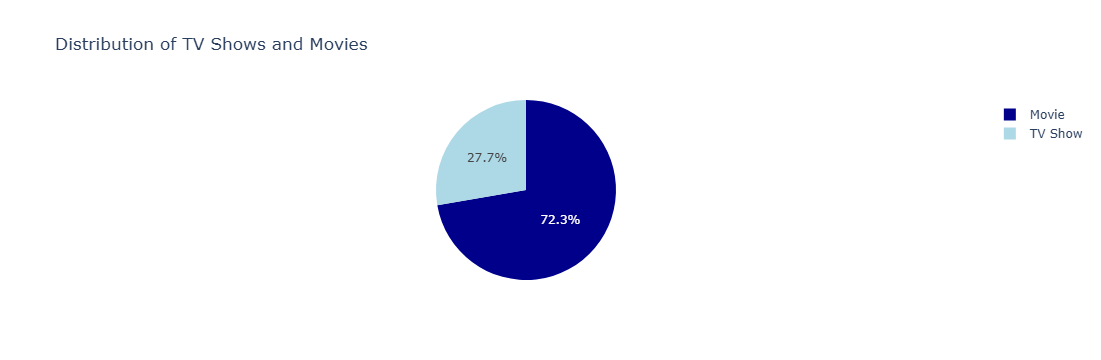

In [132]:
import plotly.express as px

# Sample data
data = {
    'labels': labels,
    'values': values
}
# Create a DataFrame from the data
df = pd.DataFrame(data)

# Define colors
colors = ['#ADD8E6', '#00008B']  # Light blue and dark blue

# Create the pie chart
fig = px.pie(df, names='labels', values='values', title='Distribution of TV Shows and Movies')

# Set colors
fig.update_traces(marker=dict(colors=colors))

# Show the figure
fig.show()

### 2. What is the distribution of content on Netflix across different categories?

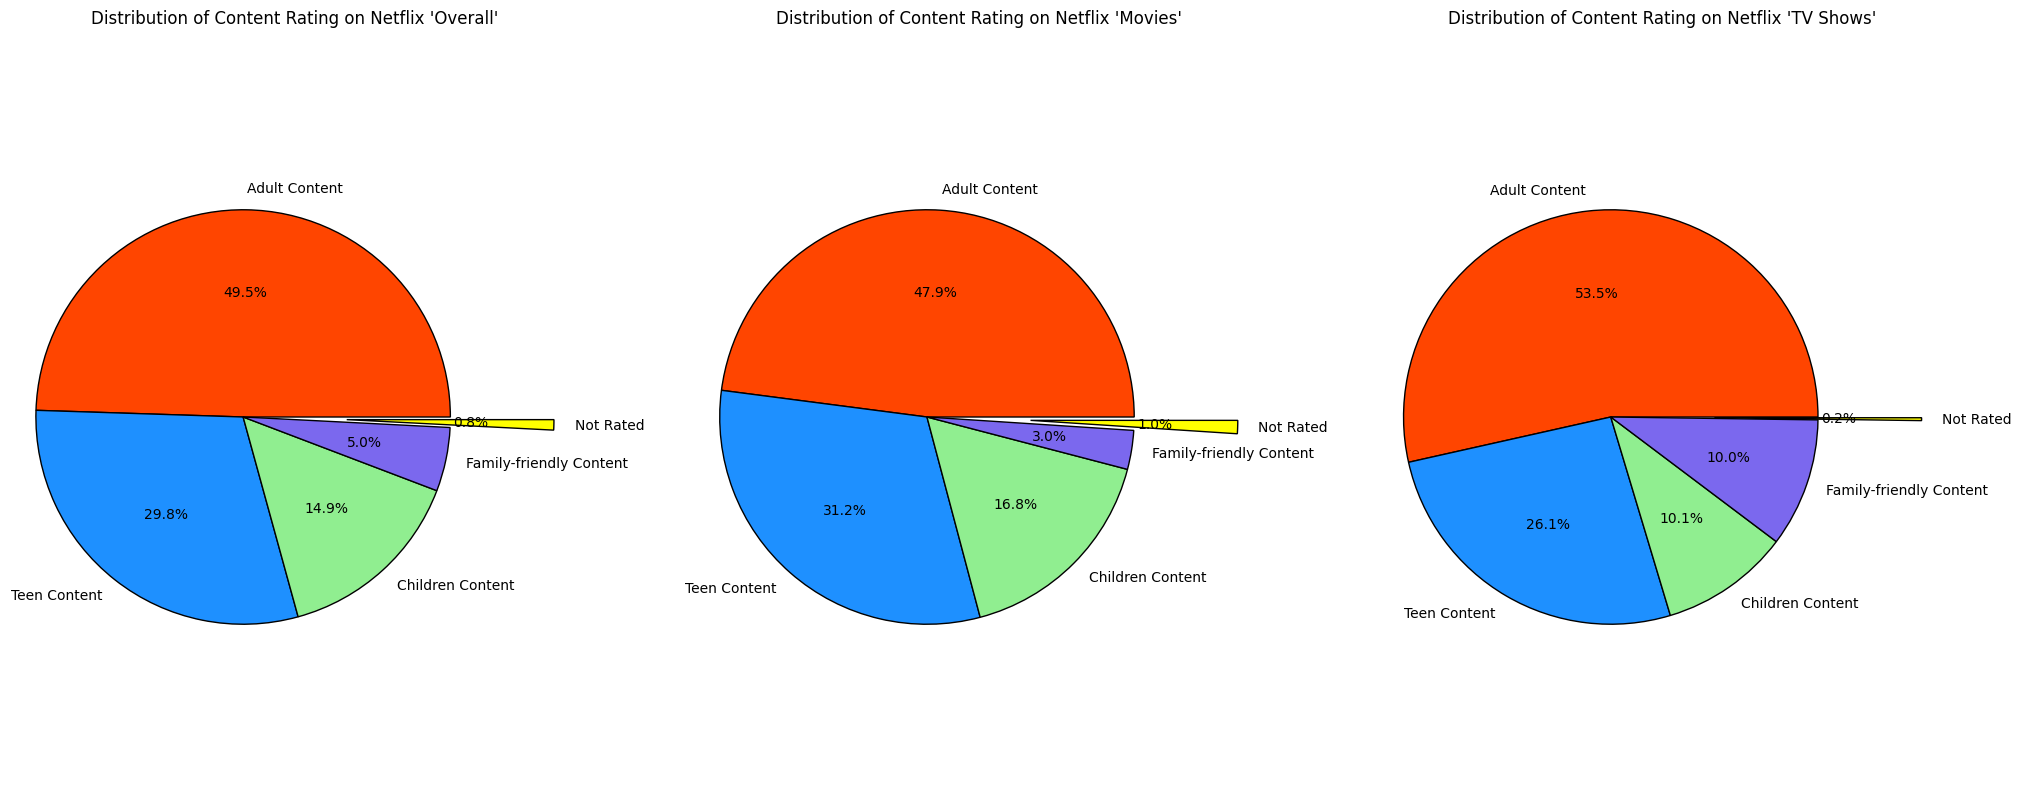

In [134]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 10))

# Define a more reliable color palette and adjust explode as needed
colors = ['orangered', 'dodgerblue', 'lightgreen', 'mediumslateblue', 'yellow']

for i, j, k in ((netflix_df, 'Overall', 0), (df_movies, 'Movies', 1), (df_tvshows, 'TV Shows', 2)):
    plt.subplot(1, 3, k + 1)
    count = i['rating'].value_counts()
    
    # Ensure explode is appropriate
    explode = (0,) * (len(count) - 1) + (0.5,)  # Explode only the last slice or adjust as needed
    
    plt.pie(
        count,
        labels=count.index,
        explode=explode,
        colors=colors[:len(count)],  # Adjust color list length to match unique values
        autopct='%1.1f%%',
        labeldistance=1.1,
        wedgeprops={"edgecolor": "black", 'linewidth': 1, 'antialiased': True}
    )
    plt.title(f"Distribution of Content Rating on Netflix '{j}'")
    plt.axis('equal')

plt.show()



### 3. Who are the top actors performing in Movies and TV Show

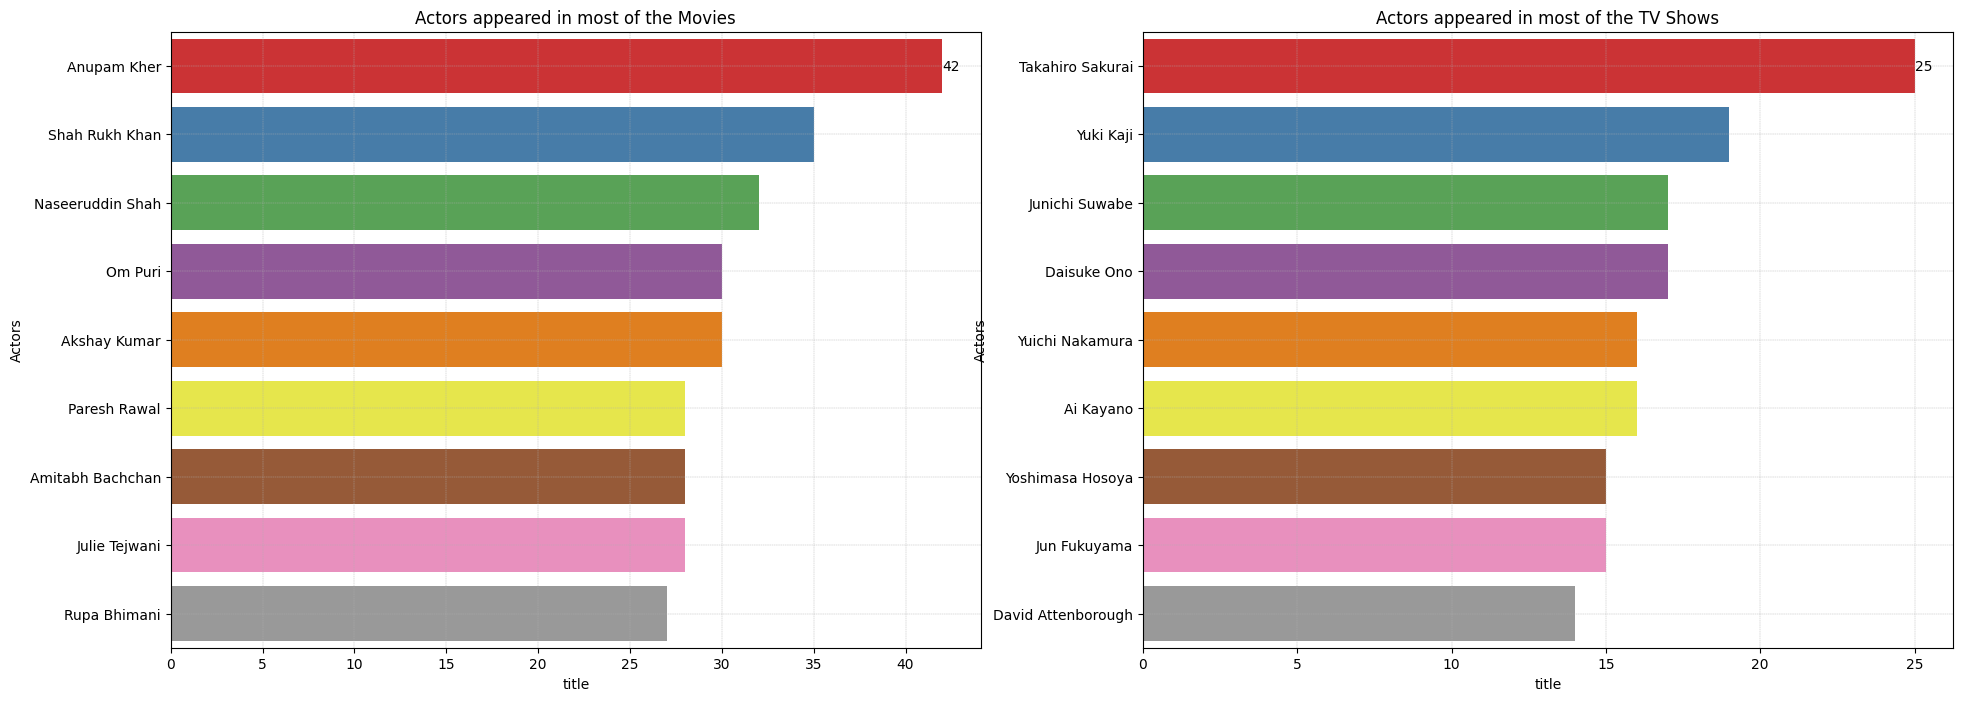

In [136]:
# Top 10 casts in Movies and TV Shows
plt.style.use('default')
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_actor = i.groupby(['Actors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[1:10]
  plots= sns.barplot(y = "Actors",x = 'title', data = df_actor, palette='Set1')
  plt.title(f'Actors appeared in most of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

### 4. Who are the top Directors directing Movies and TV Shows?

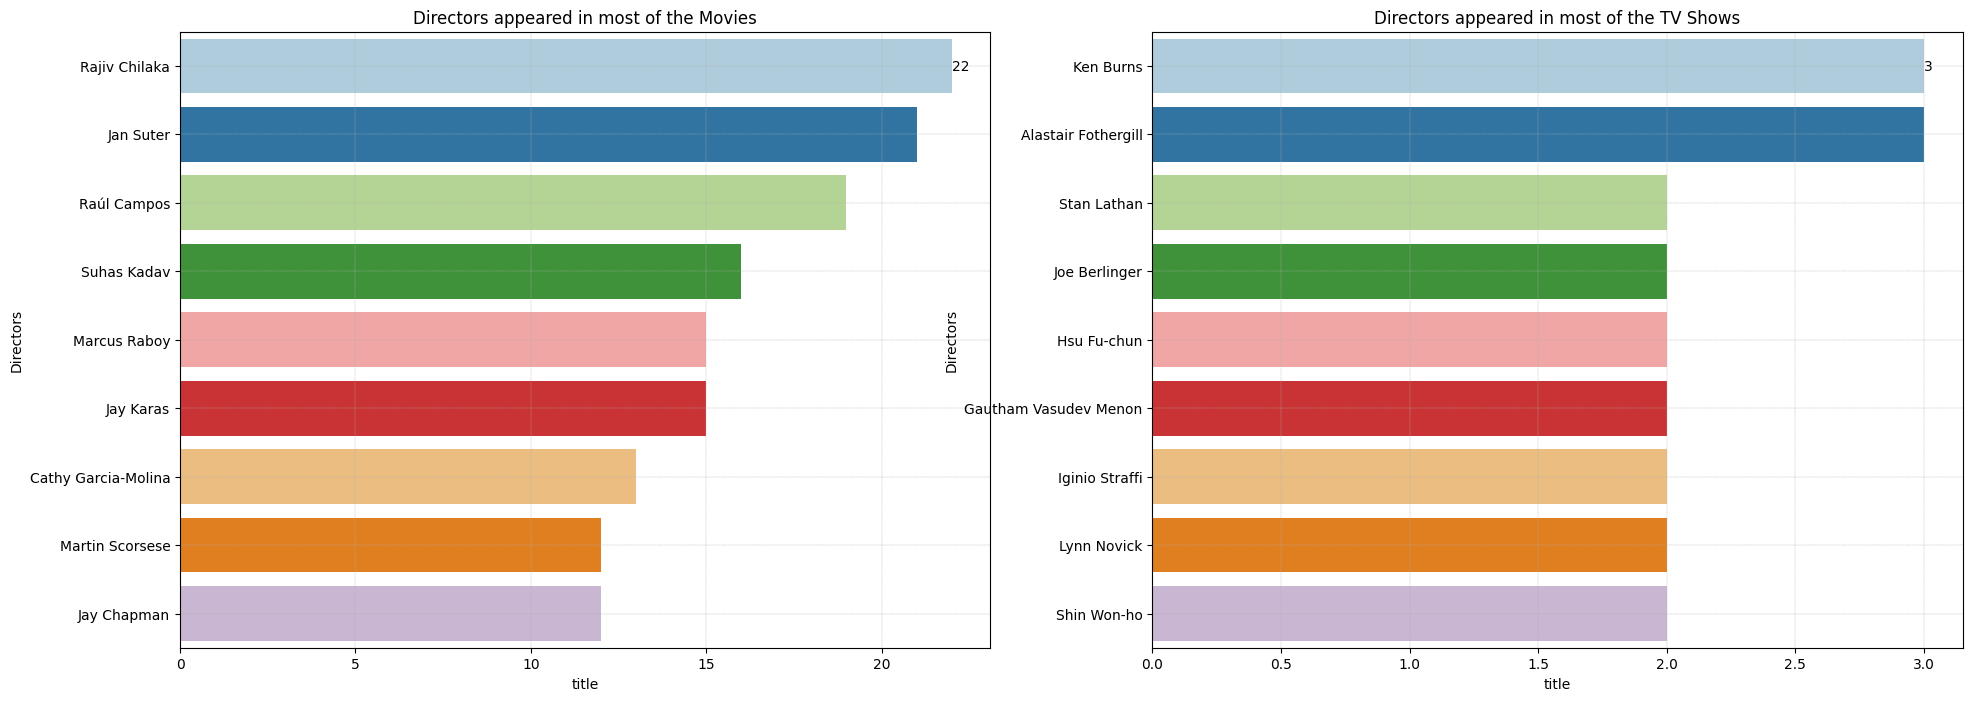

In [138]:
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_director = i.groupby(['Directors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[1:10]
  plots= sns.barplot(y = "Directors",x = 'title', data = df_director, palette='Paired')
  plt.title(f'Directors appeared in most of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

### 5. Total Number of Movies/TV Shows added per day on Netflix.

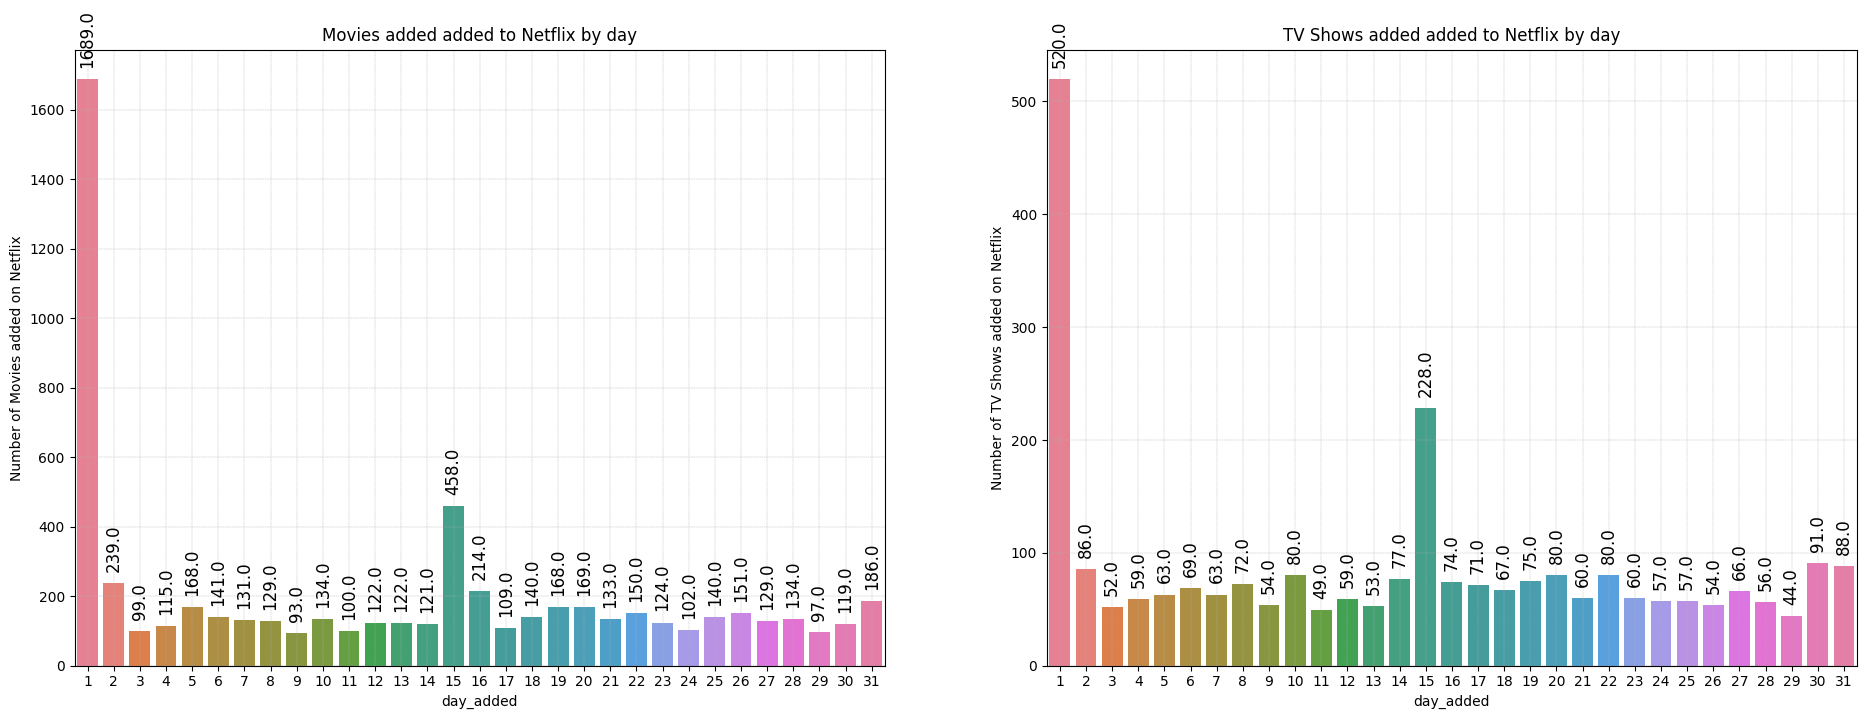

In [140]:
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_day = i.groupby(['day_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['day_added'],ascending=False)
  plots= sns.barplot(x = 'day_added',y='title', data = df_day, palette='husl')
  plt.title(f'{j} added added to Netflix by day')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)
  for bar in plots.patches:
     plots.annotate(bar.get_height(),                                              # husl pallate for beautiful colors
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='bottom',
                    size=12, xytext=(0, 8),
                    textcoords='offset points', rotation=90)
plt.show()

### 6. Total Number of Movies/TV Shows added per month on Netflix.

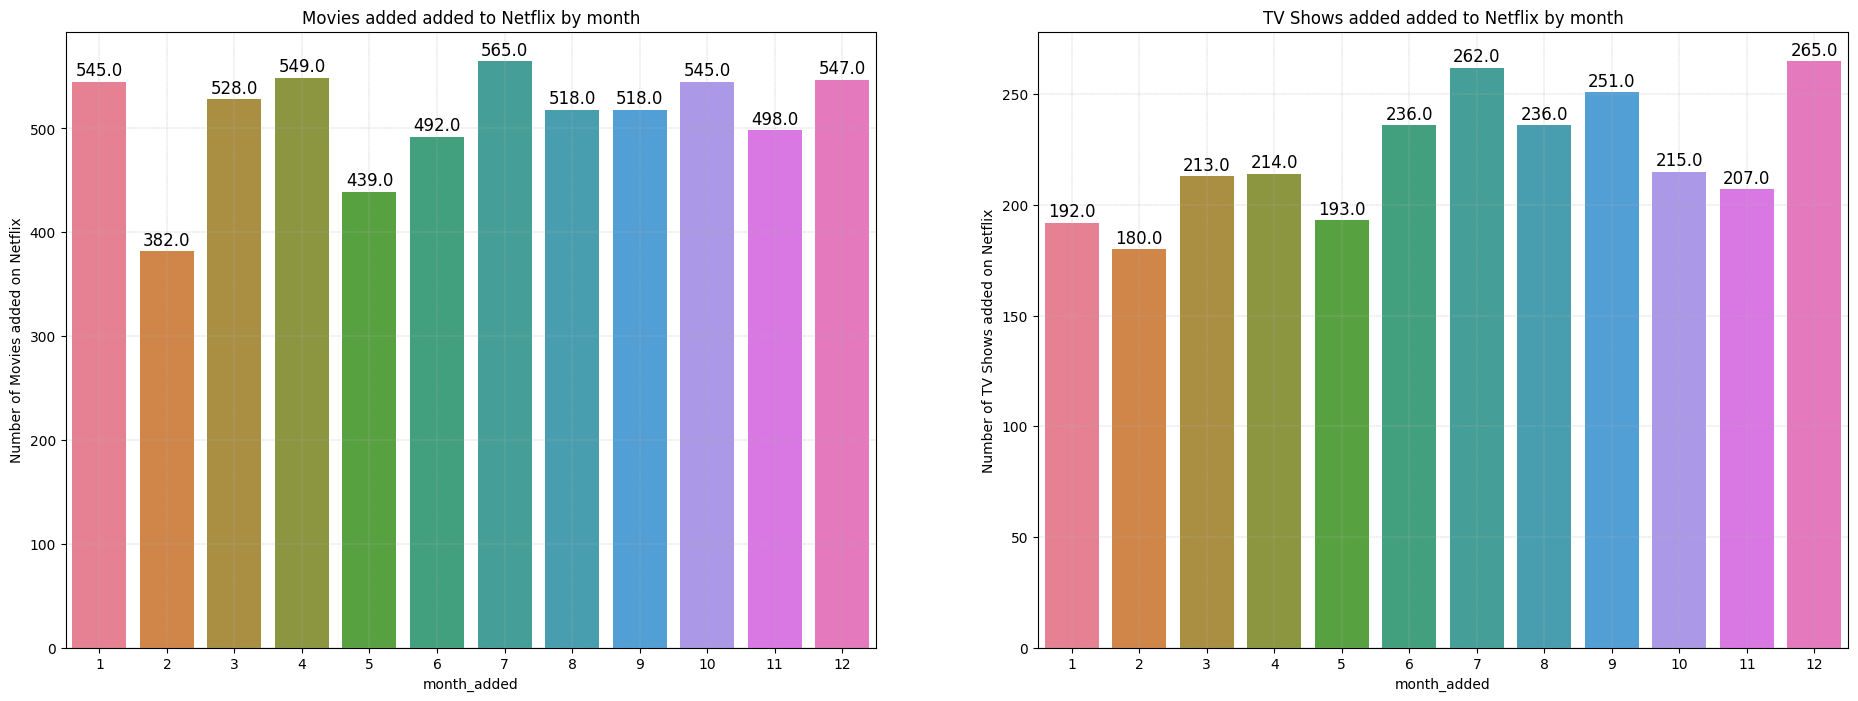

In [142]:
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_month = i.groupby(['month_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['month_added'],ascending=False)
  plots= sns.barplot(x = 'month_added',y='title', data = df_month, palette='husl')
  plt.title(f'{j} added added to Netflix by month')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)
  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()

### 7. Total Number of Movies/TV Shows added per year on Netflix.

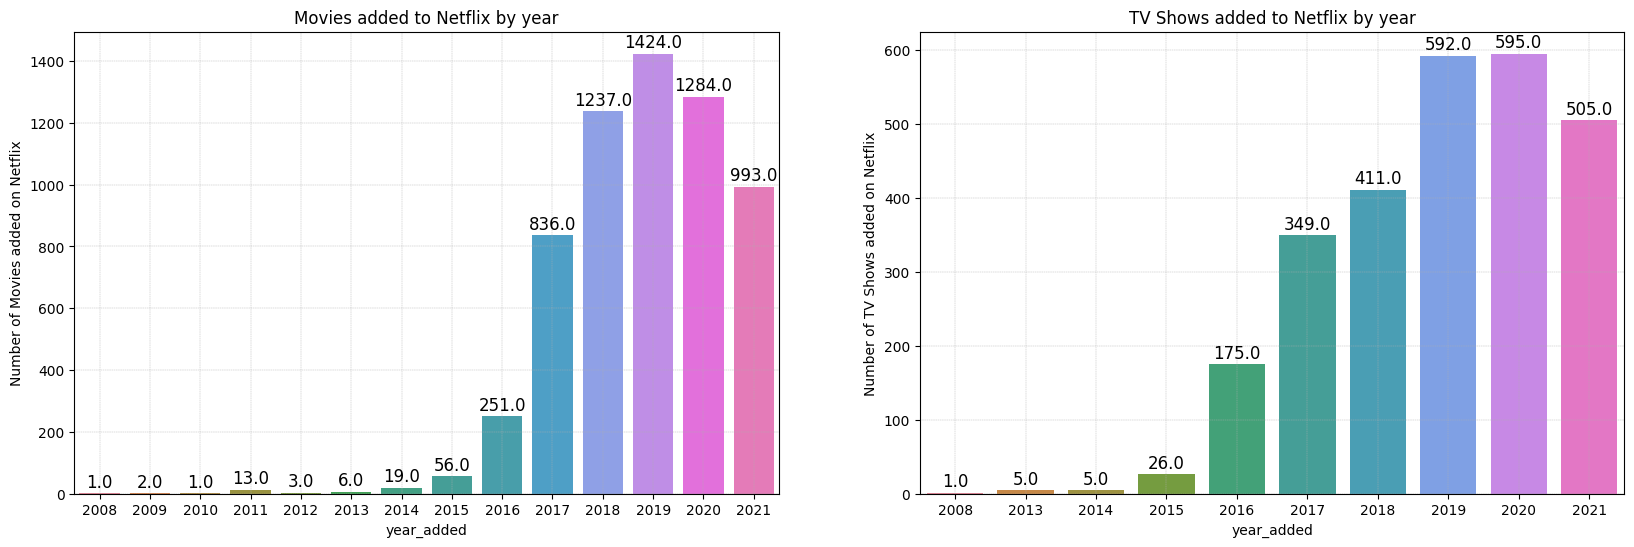

In [144]:
plt.figure(figsize=(20,6))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_country = i.groupby(['year_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['year_added'],ascending=False)
  plots= sns.barplot(x = 'year_added',y= 'title', data = df_country, palette='husl')
  plt.title(f'{j} added to Netflix by year')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)

  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()

### 8 Which Countries has the highest spread of Movies and TV Shows over Netflix)

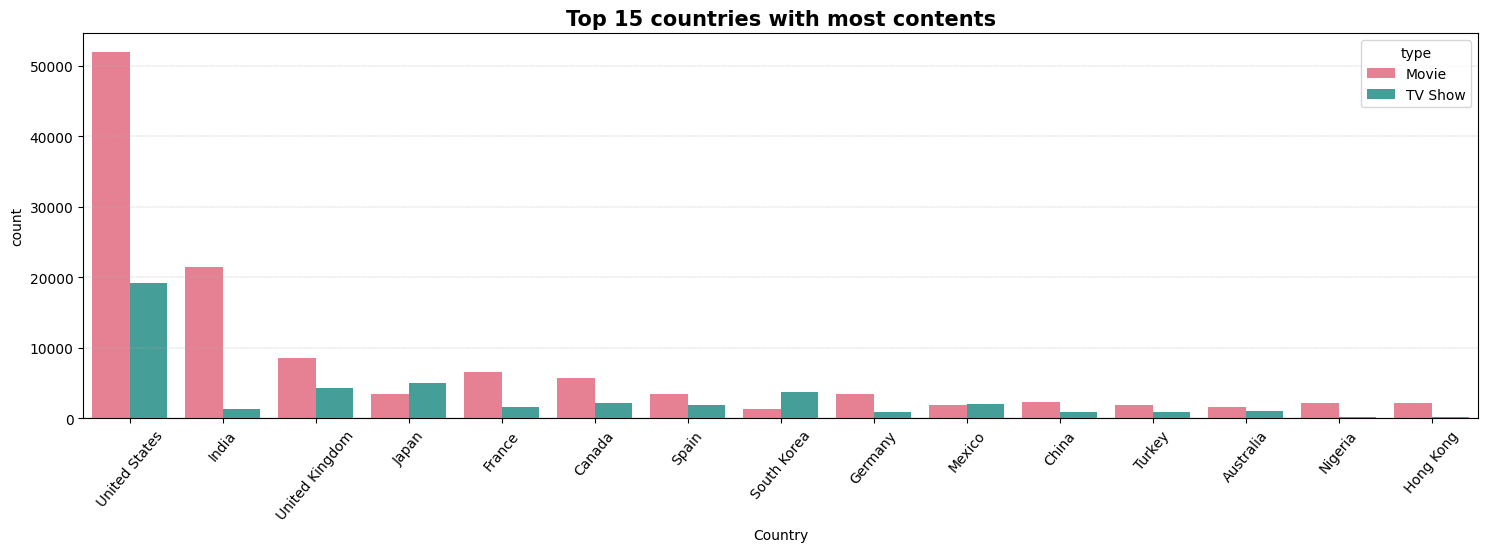

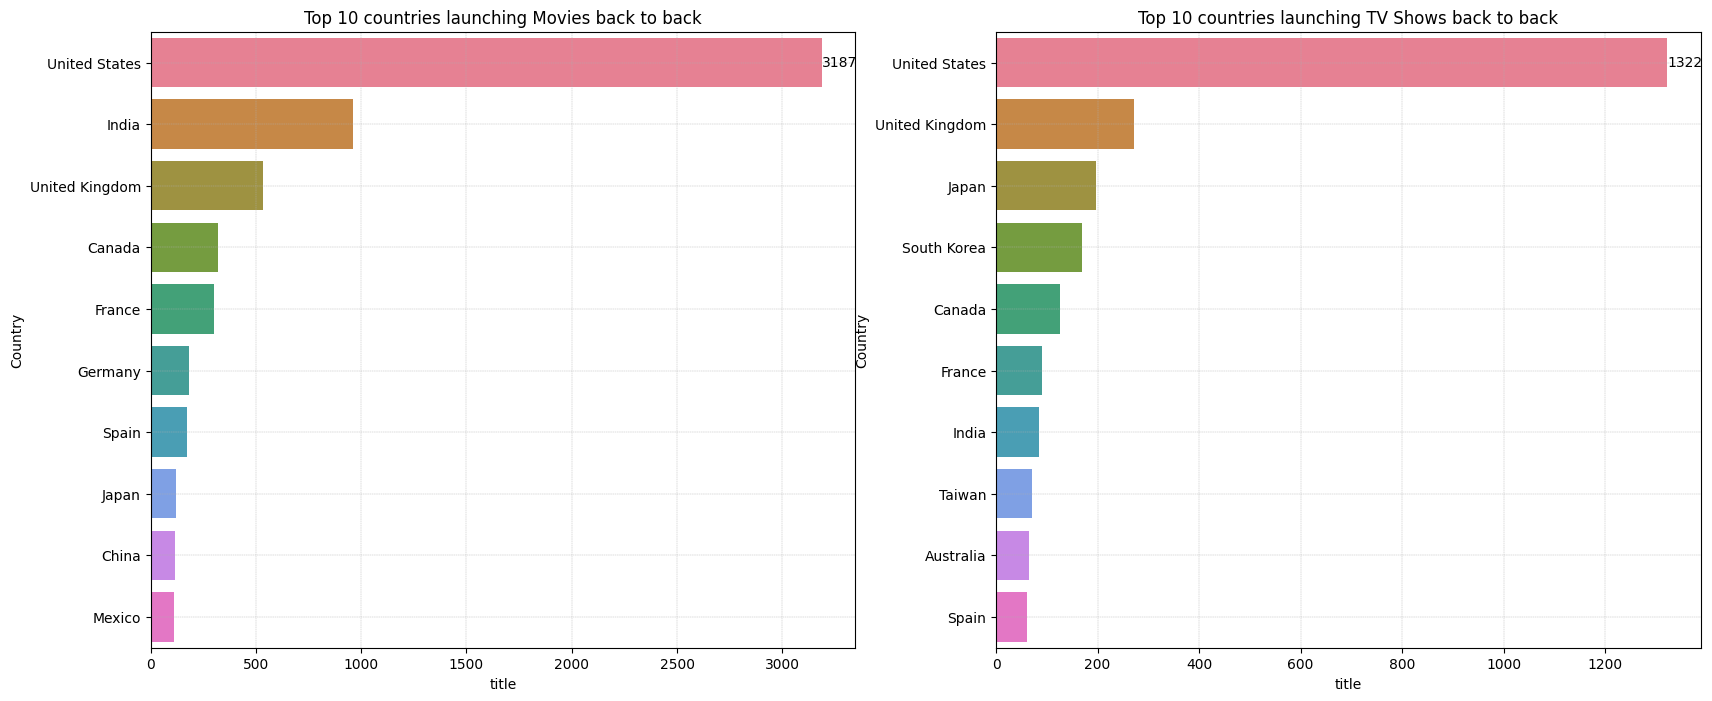

In [146]:
#Analysing top15 countries with most content
plt.figure(figsize=(18,5))
plt.grid(linestyle='--', linewidth=0.3)
sns.countplot(x=netflix_df['Country'],order=netflix_df['Country'].value_counts().index[0:15],hue=netflix_df['type'],palette ="husl")
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

plt.figure(figsize=(20,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_country = i.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
  plots= sns.barplot(y = "Country",x = 'title', data = df_country, palette='husl')
  plt.title(f'Top 10 countries launching {j} back to back')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

### 9.Which Genres are Popular in Netflix

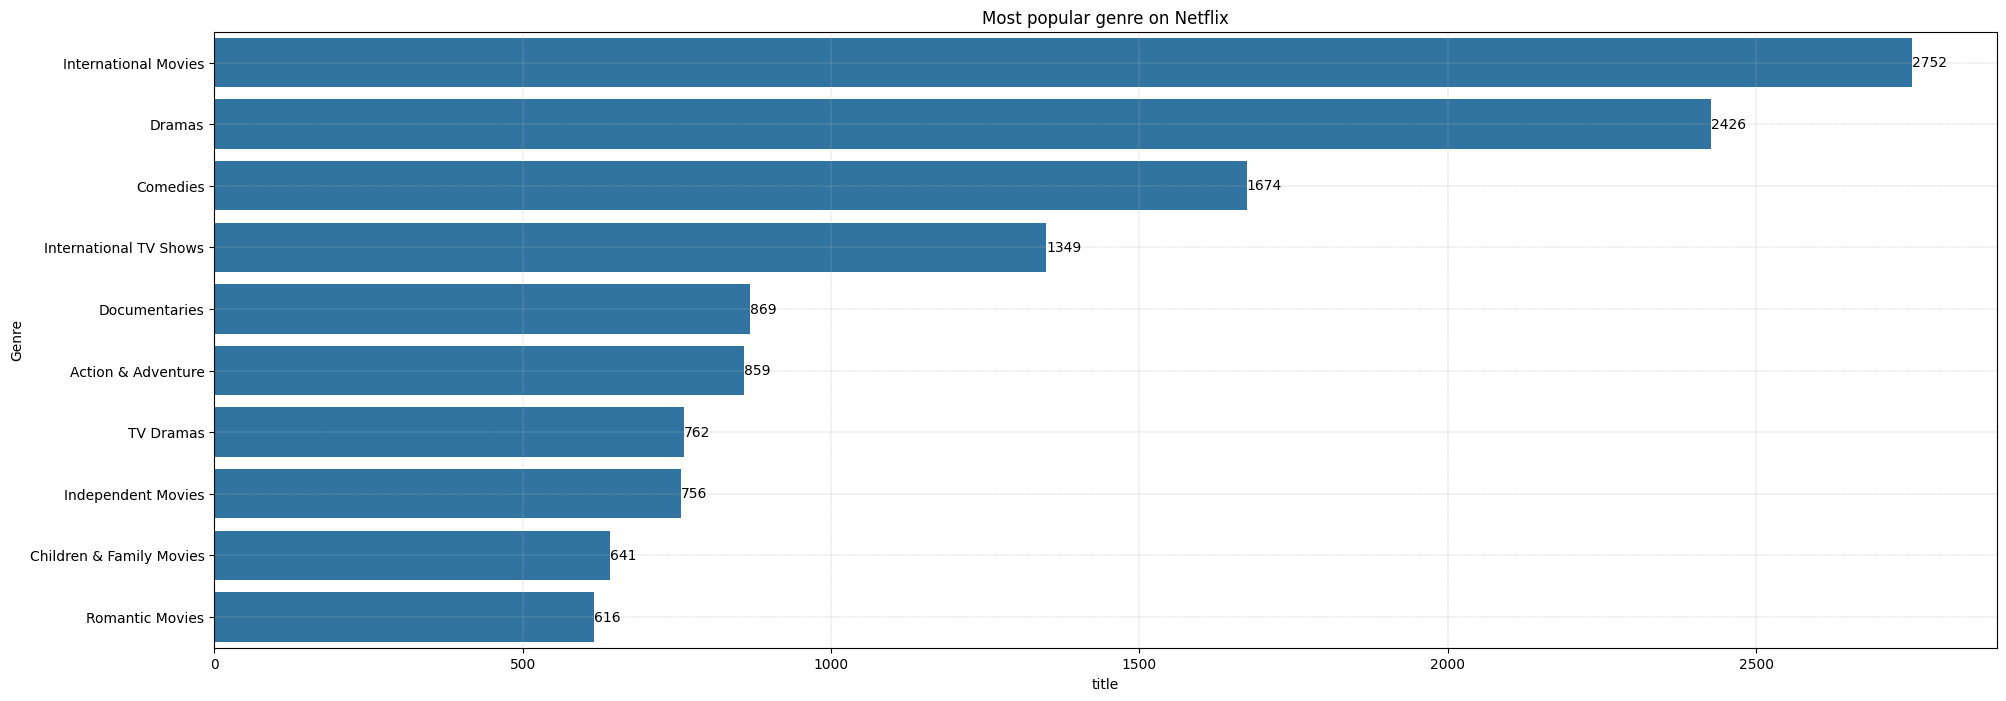

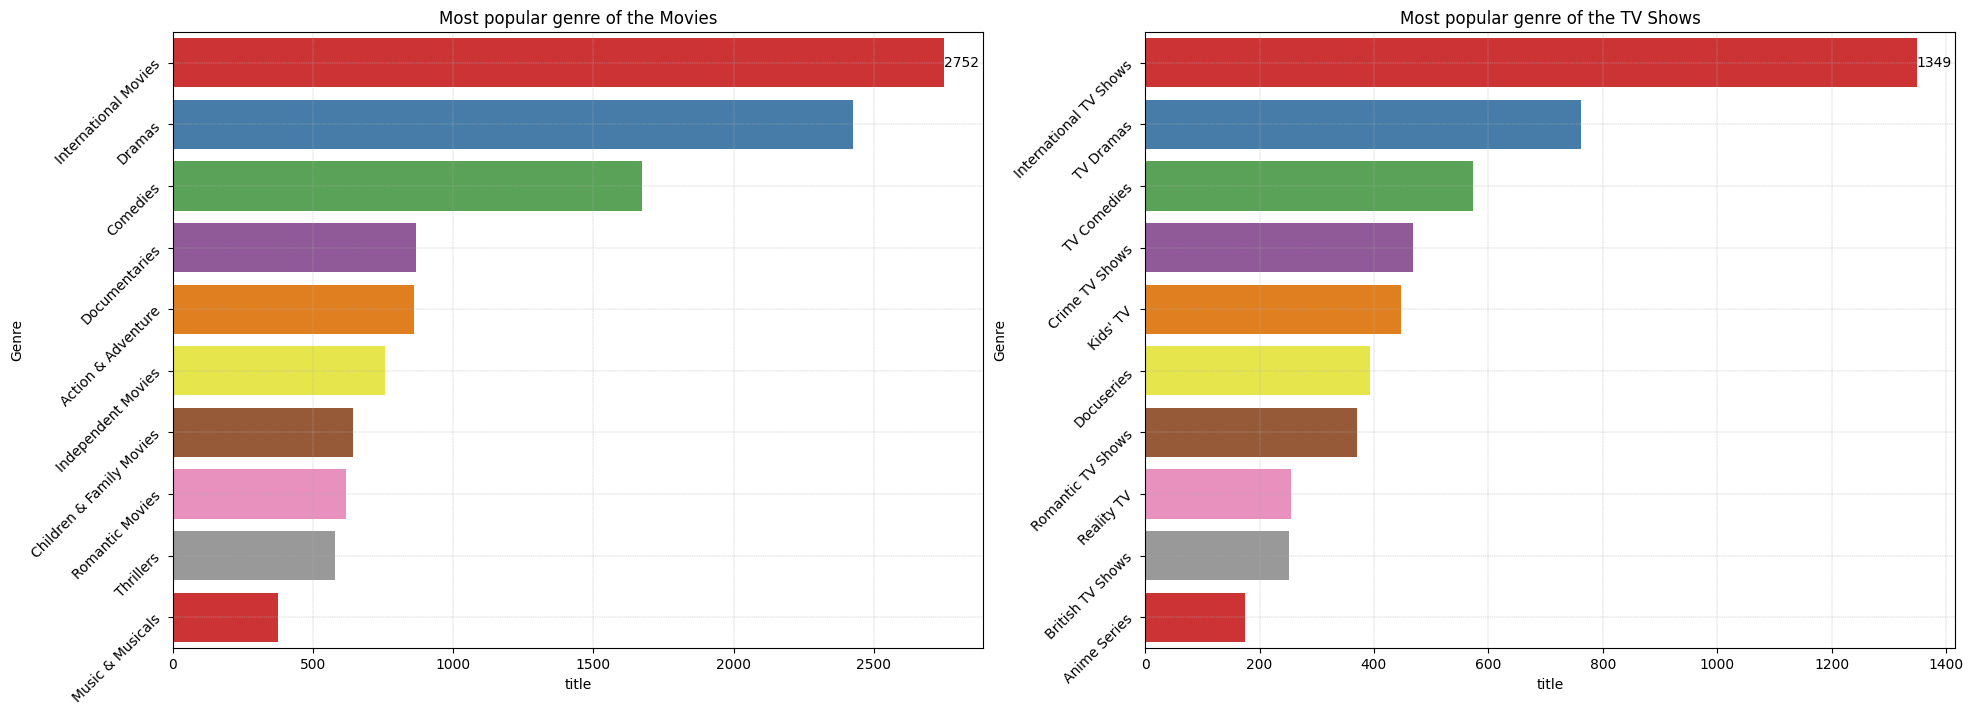

In [148]:
plt.figure(figsize=(23,8))
df_genre = netflix_df.groupby(['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plots= sns.barplot(y = "Genre",x = 'title', data = df_genre)
plt.title(f'Most popular genre on Netflix')
plt.grid(linestyle='--', linewidth=0.3)
plots.bar_label(plots.containers[0])
plt.show()

plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_genre = i.groupby(['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
  plots= sns.barplot(y = "Genre",x = 'title', data = df_genre, palette='Set1')
  plt.title(f'Most popular genre of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
  plt.yticks(rotation = 45)
plt.show()

### 10. What is the Day-wise number of content added in each year on Netflix?

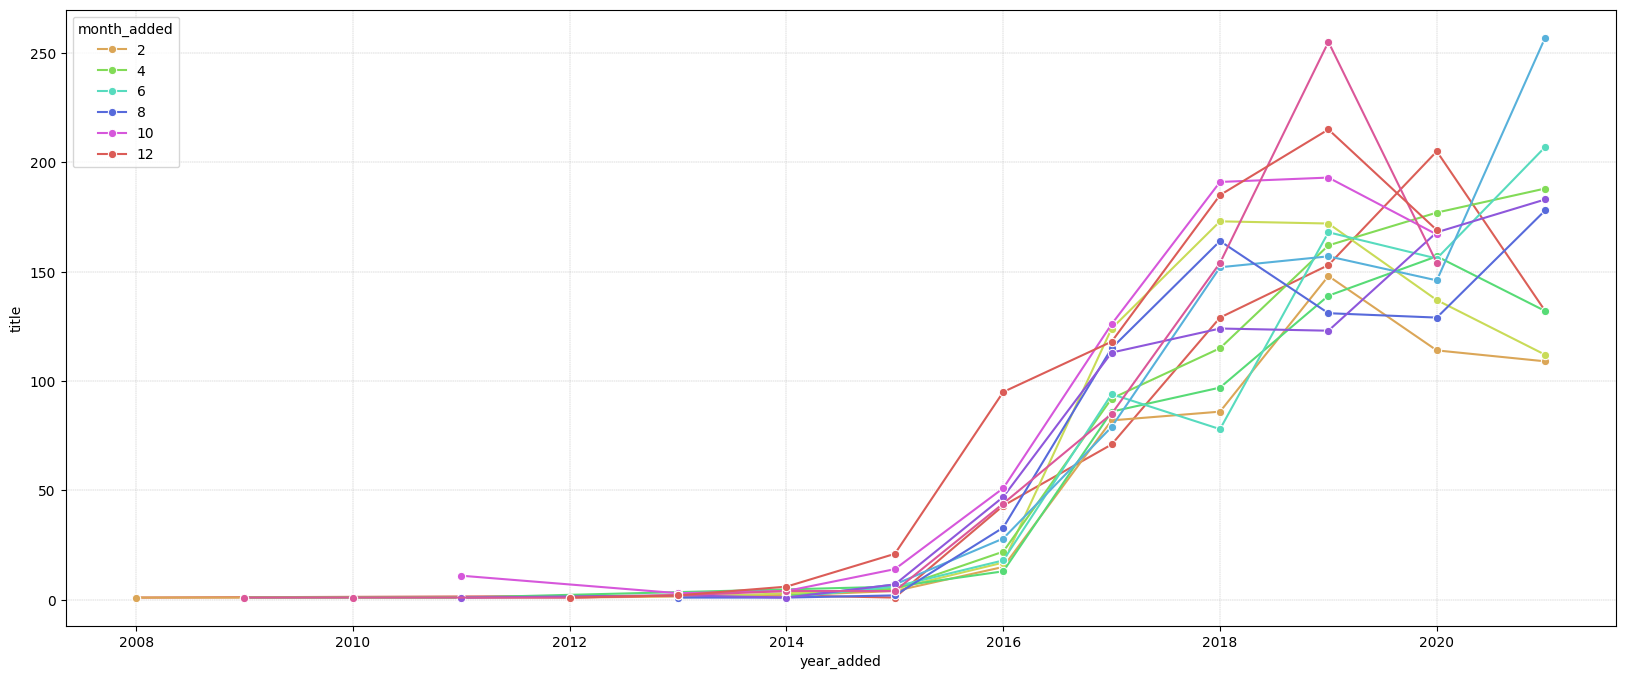

In [150]:
plt.figure(figsize=(20,8))
df_year_month = netflix_df.groupby(['year_added','month_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['year_added'],ascending=False)
sns.lineplot(x = 'year_added',y='title', data = df_year_month, palette = 'hls', hue=df_year_month['month_added'], marker='o')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()

### 11. What is the Distribution of Duration of contents over Netflix ?

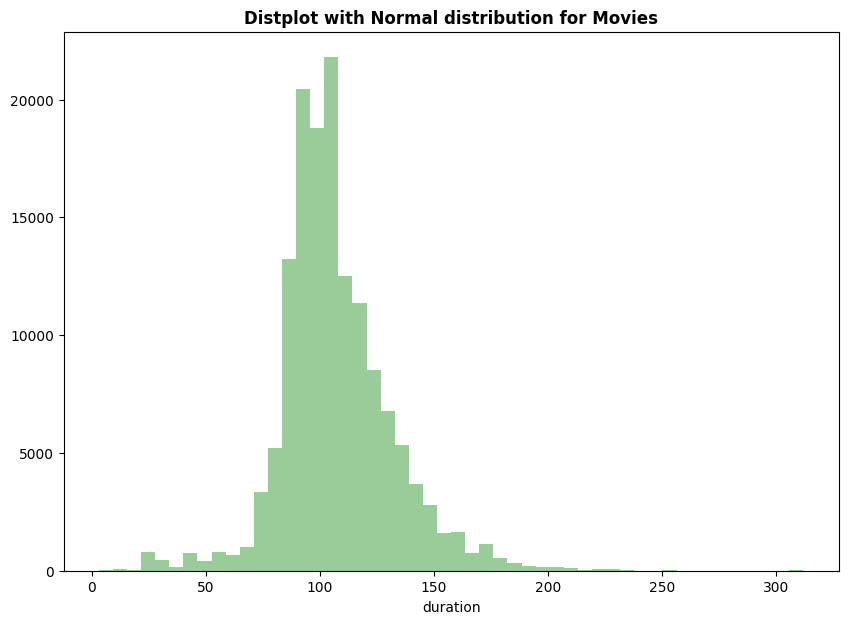

In [152]:
#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
plots= sns.distplot(df_movies['duration'],kde=False, color=['green'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

### 12. What is the Distribution of Content Rating in each highest content creating countries?

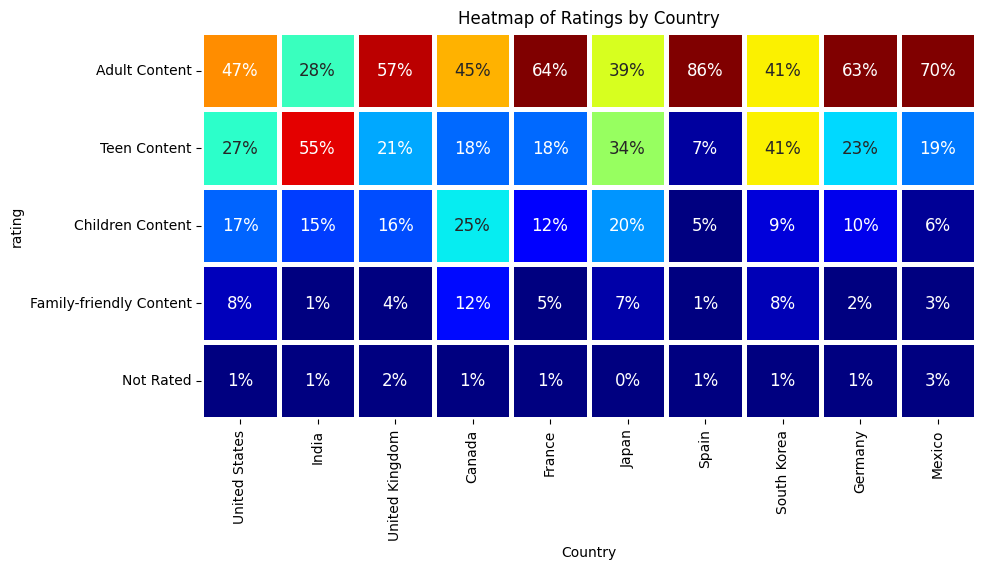

In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add a 'count' column for aggregation
netflix_df['count'] = 1

# Get the top 10 countries by count
top_countries = netflix_df.groupby('Country')['count'].sum().sort_values(ascending=False).head(10).index

# Filter the DataFrame for top 10 countries
df_heatmap = netflix_df[netflix_df['Country'].isin(top_countries)]

# Create a crosstab for the heatmap
df_heatmap_crosstab = pd.crosstab(df_heatmap['Country'], df_heatmap['rating'], normalize='index').T

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(10, 8))

# Defining the order of representation
country_order = ['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Japan', 'Spain', 'South Korea', 'Germany', 'Mexico']
rating_order = ['Adult Content', 'Teen Content', 'Children Content', 'Family-friendly Content', 'Not Rated']

# Plotting the heatmap
sns.heatmap(df_heatmap_crosstab.loc[rating_order, country_order], cmap='jet', square=True, linewidths=2.5, cbar=False, annot=True, fmt='1.0%',
            vmax=0.6, vmin=0.05, ax=ax, annot_kws={"fontsize": 12})

plt.title('Heatmap of Ratings by Country')
plt.show()


# 5. Hypothesis Testing


### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

*Hypothetical Statement 1:*
* **Null Hypothesis**: There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

* **Alternative Hypothesis**: There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

*Hypothetical Statement 2:*
* **Null Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.

* **Alternative Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.

*Hypothetical Statement 3:*
* **Null Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is not significantly different from the proportion of movies added on Netflix that are produced in the United States.

* **Alternative Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.

In [158]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest  #------> This function is used to perform z test of proportion.

# Subset the data to only include drama and comedy movies
subset = netflix_df[netflix_df['Genre'].str.contains('Dramas') | netflix_df['Genre'].str.contains('Comedies')]

# Calculate the proportion of drama and comedy movies
drama_prop = len(subset[subset['Genre'].str.contains('Dramas')]) / len(subset)
comedy_prop = len(subset[subset['Genre'].str.contains('Comedies')]) / len(subset)

# Set up the parameters for the z-test
count = [int(drama_prop * len(subset)), int(comedy_prop * len(subset))]
nobs = [len(subset), len(subset)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")


z-statistic:  72.23037383121805
p-value:  0.0
Reject the null hypothesis.


In [159]:
# Perform Statistical Test to obtain P-Value
# To test this hypothesis, we perform a two-sample t-test.
from scipy.stats import ttest_ind

# Create separate dataframes for TV shows in 2020 and 2021
tv_2020 = netflix_df[(netflix_df['type'] == 'TV Show') & (netflix_df['release_year'] == 2020)]
tv_2021 = netflix_df[(netflix_df['type'] == 'TV Show') & (netflix_df['release_year'] == 2021)]

# Perform two-sample t-test
t, p = ttest_ind(tv_2020['duration'].astype(int),
                 tv_2021['duration'].astype(int), equal_var=False)
print('t-value: ', t)
print('p-value: ', p)

# Print the results
if p < 0.05:
    print('Reject null hypothesis. \nThe average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.')
else:
    print('Failed to reject null hypothesis. \nThe average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.')



t-value:  6.99601273088925
p-value:  2.7354993322226077e-12
Reject null hypothesis. 
The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.


In [160]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest  #------> This function is used to perform z test of proportion.

# Calculate the proportion of drama and comedy movies
tv_proportion = np.sum(df_tvshows['Country'].str.contains('United States')) / len(df_tvshows)
movie_proportion = np.sum(df_movies['Country'].str.contains('United States')) / len(df_movies)

# Set up the parameters for the z-test
count = [int(tv_proportion * len(df_tvshows)), int(movie_proportion * len(df_movies))]
nobs = [len(df_tvshows), len(df_movies)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")


z-statistic:  -6.036110169468344
p-value:  1.578734899437684e-09
Reject the null hypothesis.


# 6. Feature Engineering & Data Pre-processing

## 6.1 Handling Missing Values 

In [163]:
netflix_df.isna().sum()

title           0
Actors          0
Directors       0
Genre           0
Country         0
type            0
release_year    0
rating          0
duration        0
description     0
day_added       0
month_added     0
year_added      0
count           0
dtype: int64

## 6.2 Handling Outliers

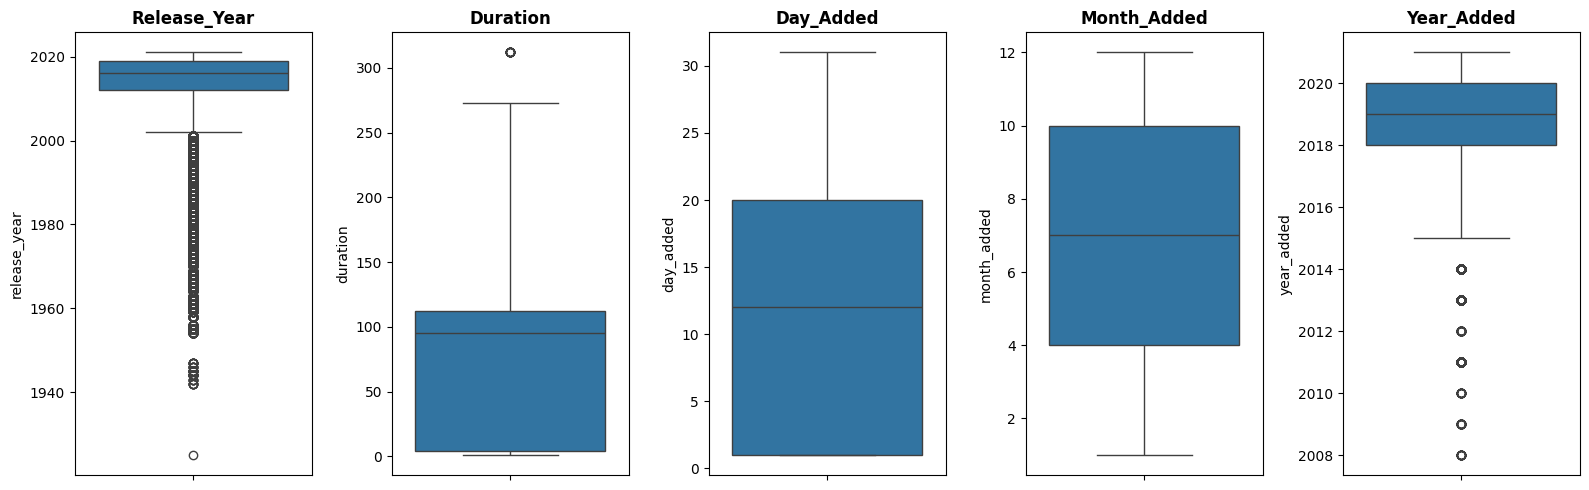

In [165]:
# Storing the continous value feature in a separate list
continous_value_feature= ["release_year","duration","day_added","month_added","year_added"]

# checking outliers with the help of box plot for continous features
plt.figure(figsize=(16,5))
for n,column in enumerate(continous_value_feature):
  plt.subplot(1, 5, n+1)
  sns.boxplot(netflix_df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

Although we have some anomalies in continuous features we will not treat them by considering outliers as some of the Movies/TV Shows have been released or added early on Netflix.

## 6.3 Textual Data Preprocessing


In [168]:
# Here we are taking the copied dataframe as the data having more number of observations resulted in ram exhaustion.
netflix_df.shape, df_new.shape

((201763, 14), (8790, 12))

In [169]:
# Binning of rating in new dataframe
df_new['rating'].replace(rating_map, inplace = True)

# Checking sample after binning
df_new.shape

(8790, 12)

In [170]:
df_new.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,Teen Content,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,Adult Content,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,Adult Content,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,"September 24, 2021",2021,Adult Content,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,Adult Content,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### 6.3.1 Extract details from each textual Columns

In [172]:
# Creating new feature content_detail with the help of other textual attributes
df_new["content_detail"]= df_new["cast"]+" "+df_new["director"]+" "+df_new["listed_in"]+" "+df_new["type"]+" "+df_new["rating"]+" "+df_new["country"]+" "+df_new["description"]

#checking the manipulation
df_new.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,content_detail
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,Teen Content,90 min,Documentaries,"As her father nears the end of his life, filmm...",Unknown Kirsten Johnson Documentaries Movie Te...
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,Adult Content,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."


### 6.3.2 Lower Casing

In [174]:
# Lower Casing
df_new['content_detail']= df_new['content_detail'].str.lower()

### 6.3.3 Removing Punctuations

In [176]:
# function to remove punctuations
def remove_punctuations(text):
    '''This function is used to remove the punctuations from the given sentence'''
    #imorting needed library
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped off punctuation marks
    return text.translate(translator)

In [177]:
# Removing Punctuations from the content_detail
df_new['content_detail']= df_new['content_detail'].apply(remove_punctuations)

### 6.3.4 Removing URLs & Removing words and digits contain digits.

In [179]:

def remove_url_and_numbers(text):
    '''This function is used to remove the URL's and Numbers from the given sentence'''
    # importing needed libraries
    import re
    import string

    # Replacing the URL's with no space
    url_number_pattern = re.compile(r'https?://\S+|www\.\S+')
    text= re.sub(url_number_pattern,'', text)

    # Replacing the digits with one space
    text = re.sub('[^a-zA-Z]', ' ', text)

    # return the text stripped off URL's and Numbers
    return text

In [180]:
# Remove URLs & Remove words and digits contain digits
df_new['content_detail']= df_new['content_detail'].apply(remove_url_and_numbers)

### 6.3.5 Removing Stopwords & Removing White spaces

In [182]:
# Downloading stopwords
nltk.download('stopwords')

# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\daven\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [183]:
def remove_stopwords_and_whitespaces(text):
    '''This function is used for removing the stopwords from the given sentence'''
    text = [word for word in text.split() if not word in stopwords.words('english')]

    # joining the list of words with space separator
    text=  " ".join(text)

    # removing whitespace
    text = re.sub(r'\s+', ' ', text)

    # return the manipulated string
    return text

In [184]:
import re
# Remove URLs & Remove words and digits contain digits
df_new['content_detail']= df_new['content_detail'].apply(remove_stopwords_and_whitespaces)

### 6.3.6 Tokenization

In [186]:
import spacy

# Load the SpaCy model for English
nlp = spacy.load("en_core_web_sm")

# Define a function to tokenize using SpaCy
def spacy_tokenize(text):
    doc = nlp(text)
    return [token.text for token in doc]

# Apply the tokenization to the 'content_detail' column
df_new['content_detail'] = df_new['content_detail'].apply(spacy_tokenize)

# Checking the observation after manipulation
df_new.iloc[281]['content_detail']

['mike',
 'ezuruonye',
 'juliet',
 'ochienge',
 'angela',
 'okorie',
 'huddah',
 'monroe',
 'catherine',
 'kamau',
 'naomi',
 'mburu',
 'derrick',
 'aduwo',
 'chris',
 'kamau',
 'abubakar',
 'salum',
 'celebrity',
 'landlord',
 'charles',
 'uwagbai',
 'comedies',
 'international',
 'movies',
 'movie',
 'teen',
 'content',
 'nigeria',
 'chasing',
 'wild',
 'success',
 'village',
 'hustler',
 'follows',
 'cousin',
 'nigeria',
 'kenya',
 'stumbles',
 'shady',
 'business',
 'affairs',
 'notorious',
 'overlord']

### 6.3.7 Text Normalization

In [188]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Importing WordNetLemmatizer from nltk module
from nltk.stem import WordNetLemmatizer

# Creating instance for wordnet
wordnet  = WordNetLemmatizer()

In [189]:
def lemmatizing_sentence(text):
    '''This function is used for lemmatizing (changing the given word into meaningfull word) the words from the given sentence'''
    text = [wordnet.lemmatize(word) for word in text]

    # joining the list of words with space separator
    text=  " ".join(text)

    # return the manipulated string
    return text

In [190]:
# Downloading needed libraries
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Rephrasing text by applying defined lemmatizing function
df_new['content_detail']= df_new['content_detail'].apply(lemmatizing_sentence)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\daven\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\daven\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'mike ezuruonye juliet ochienge angela okorie huddah monroe catherine kamau naomi mburu derrick aduwo chris kamau abubakar salum celebrity landlord charles uwagbai comedy international movie movie teen content nigeria chasing wild success village hustler follows cousin nigeria kenya stumble shady business affair notorious overlord'

### 6.3.8 Part of speech tagging

In [192]:

# Load the SpaCy model for English
nlp = spacy.load("en_core_web_sm")

# Define a function to perform tokenization and POS tagging using SpaCy
def spacy_pos_tagging(text):
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

# Apply the function to the 'content_detail' column
df_new['pos_tags'] = df_new['content_detail'].apply(spacy_pos_tagging)

# Checking the observation after manipulation
df_new.head(5)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,content_detail,pos_tags
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,Teen Content,90 min,Documentaries,"As her father nears the end of his life, filmm...",unknown kirsten johnson documentary movie teen...,"[(unknown, PROPN), (kirsten, PROPN), (johnson,..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,Adult Content,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",ama qamata khosi ngema gail mabalane thabang m...,"[(ama, PROPN), (qamata, PROPN), (khosi, PROPN)..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,Adult Content,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,sami bouajila tracy gotoas samuel jouy nabiha ...,"[(sami, PROPN), (bouajila, PROPN), (tracy, PRO..."
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,"September 24, 2021",2021,Adult Content,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",unknown unknown docuseries reality tv tv show ...,"[(unknown, ADJ), (unknown, ADJ), (docuseries, ..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,Adult Content,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,mayur jitendra kumar ranjan raj alam khan ahsa...,"[(mayur, PROPN), (jitendra, PROPN), (kumar, PR..."


### 6.3.9 Text Vectorization

In [194]:
# Vectorizing Text
# Importing needed libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating instance
tfidfv = TfidfVectorizer(max_features=30000)        # Setting max features as 30000 to avoid RAM explosion


In [225]:
# Fitting on TfidfVectorizer
x= tfidfv.fit_transform(df_new['content_detail'])

# Checking shape of the formed document matrix
print(x.shape)

(8790, 30000)


## 6.4 Dimesionality Reduction

In [228]:
# Dimensionality Reduction
# Importing PCA from sklearn
from sklearn.decomposition import PCA

# Defining PCA object with desired number of components
pca = PCA()

# Fitting the PCA model
pca.fit(x.toarray())

# percent of variance captured by each component
variance = pca.explained_variance_ratio_
print(f"Explained variance: {variance}")

Explained variance: [1.44597546e-02 3.91328116e-03 3.27672957e-03 ... 7.36722416e-36
 3.00918095e-36 2.26646460e-36]


In [229]:
len(variance)

8790

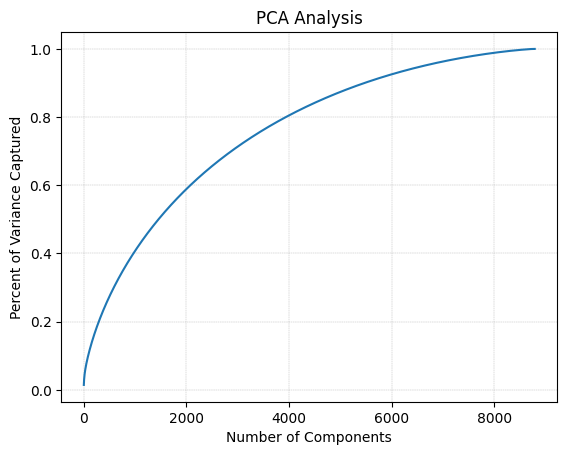

In [230]:

# Ploting the percent of variance captured versus the number of components in order to determine the reduced dimensions
fig, ax = plt.subplots()
ax.plot(range(1, len(variance)+1), np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of Components')
ax.set_ylabel('Percent of Variance Captured')
ax.set_title('PCA Analysis')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()


It is clear from the above plot that 8600 principal components can capture the 100% of variance. For our case we will consider only those number of PC's that can capture 95% of variance.

In [232]:
## Now we are passing the argument so that we can capture 95% of variance.
# Defining instance
pca_tuned = PCA(n_components=0.95)

# Fitting and transforming the model
pca_tuned.fit(x.toarray())
x_transformed = pca_tuned.transform(x.toarray())

# Checking the shape of transformed matrix
x_transformed.shape


(8790, 6613)

# 7. ML Model Implementation

## 7.1  K-Means Clustering

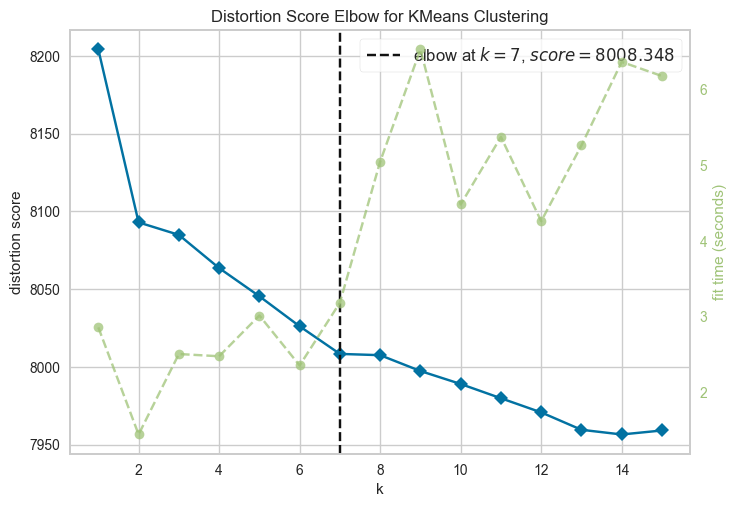

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [235]:

## Determining optimal value of K using KElbowVisualizer
# Importing needed library

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,16),locate_elbow=True)

# Fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show()

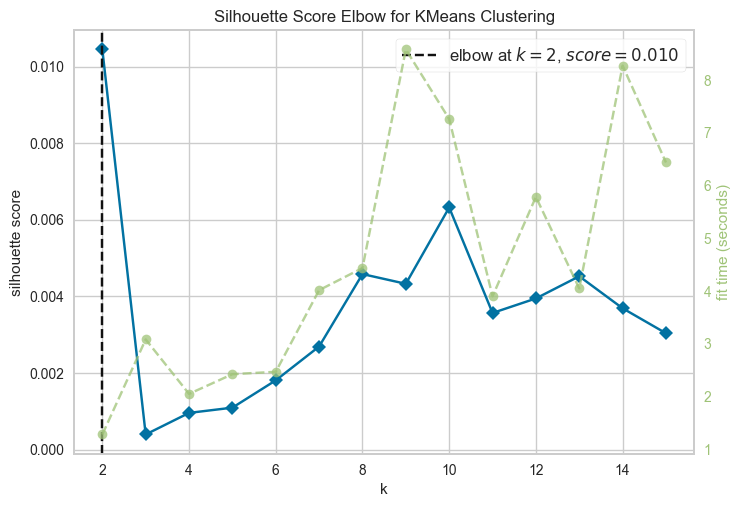

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [236]:
## Determining optimal value of K using KElbowVisualizer
# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(model, k=(2,16), metric='silhouette', timings=True, locate_elbow=True)

# Fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show()

In [237]:
## Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Defining Range
k_range = range(2, 11)
for k in k_range:
    Kmodel = KMeans(n_clusters=k)
    labels = Kmodel.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.010346
k=3, Silhouette score=0.009863
k=4, Silhouette score=0.002776
k=5, Silhouette score=0.004012
k=6, Silhouette score=0.010702
k=7, Silhouette score=0.010946
k=8, Silhouette score=0.004302
k=9, Silhouette score=0.003868
k=10, Silhouette score=0.005420


From the above plots (Elbow plot and Sillhouette plot) it is very clear that the Silhoutte score is comparatively good for 4 number of clusters, so we will consider 4 cluster in kmeans analysis.

Now let's plot and see how our data points look like after assigning to their respective clusters.

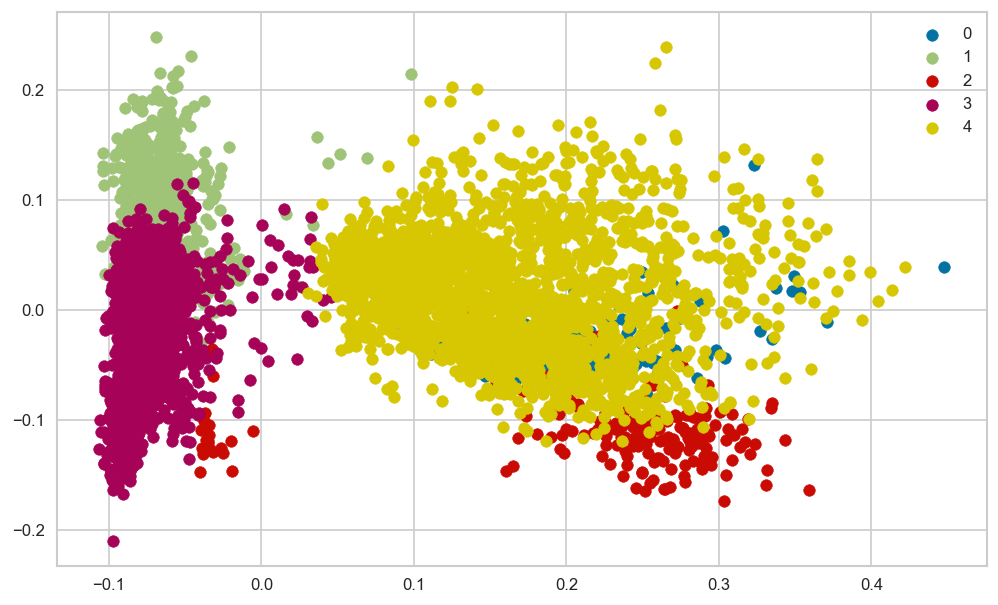

In [239]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 0)

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = kmeans.fit_predict(x_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()


We have 5 different clusters but unfortunately the above plot is in TWO-DIMENSIONAL. Let's plot the above figure in 3D using mplot3d library and see if we are getting the separated clusters.

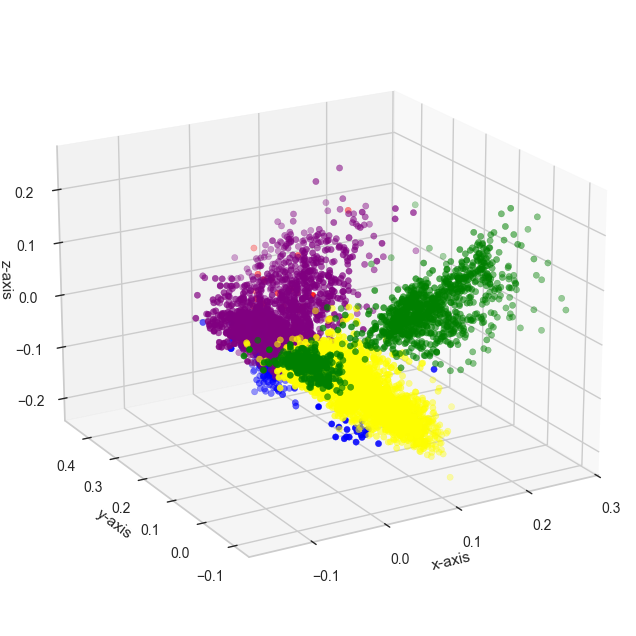

In [241]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'green', 'blue', 'yellow','purple']
for i in range(len(colors)):
    ax.scatter(x_transformed[kmeans.labels_ == i, 2], x_transformed[kmeans.labels_ == i, 0], x_transformed[kmeans.labels_ == i, 1], c=colors[i])

# Rotate the plot 30 degrees around the X axis and 45 degrees around the Z axis
ax.view_init(elev=20, azim=-120)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

Cool, we can easily differentiate the all 5 clusters with naked eye. Now let's assign the 'Conent' in their respective cluster by appending 1 more attribute in the final dataframe.

In [243]:
# Add cluster values to the dateframe.
df_new['kmeans_cluster'] = kmeans.labels_

In [244]:
df_new['kmeans_cluster'].unique()

array([1, 4, 3, 0, 2])

In [245]:
df_new.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,content_detail,pos_tags,kmeans_cluster
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,Teen Content,90 min,Documentaries,"As her father nears the end of his life, filmm...",unknown kirsten johnson documentary movie teen...,"[(unknown, PROPN), (kirsten, PROPN), (johnson,...",1
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,Adult Content,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",ama qamata khosi ngema gail mabalane thabang m...,"[(ama, PROPN), (qamata, PROPN), (khosi, PROPN)...",4
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,Adult Content,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,sami bouajila tracy gotoas samuel jouy nabiha ...,"[(sami, PROPN), (bouajila, PROPN), (tracy, PRO...",4
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,"September 24, 2021",2021,Adult Content,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",unknown unknown docuseries reality tv tv show ...,"[(unknown, ADJ), (unknown, ADJ), (docuseries, ...",4
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,Adult Content,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,mayur jitendra kumar ranjan raj alam khan ahsa...,"[(mayur, PROPN), (jitendra, PROPN), (kumar, PR...",4


In [246]:
df_new.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'content_detail', 'pos_tags', 'kmeans_cluster'],
      dtype='object')

In [247]:
df_new.shape

(8790, 15)

# 8. Building a Recommendation System

In [249]:
# Importing neede libraries
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer object and transform the text data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_new['content_detail'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

def recommend_content(title, cosine_sim=cosine_sim, data=df_new):
    # Get the index of the input title in the programme_list
    programme_list = data['title'].to_list()
    index = programme_list.index(title)

    # Create a list of tuples containing the similarity score and index
    # between the input title and all other programmes in the dataset
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the list of tuples by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Get the recommended movie titles and their similarity scores
    recommend_index = [i[0] for i in sim_scores]
    rec_movie = data['title'].iloc[recommend_index]
    rec_score = [round(i[1], 4) for i in sim_scores]

    # Create a pandas DataFrame to display the recommendations
    rec_table = pd.DataFrame(list(zip(rec_movie, rec_score)), columns=['Recommendation', 'Similarity_score(0-1)'])

    return rec_table

In [250]:
# Testing indian movie
recommend_content('Kota Factory')

,Recommendation,Similarity_score(0-1)
0,Yeh Meri Family,0.1851
1,Girls Hostel,0.1828
2,Engineering Girls,0.1644
3,Chaman Bahaar,0.1534
4,Betaal,0.1477
5,The Creative Indians,0.1358
6,Little Things,0.1334
7,Guru Aur Bhole,0.1330
8,Anjaan: Rural Myths,0.1261
9,The Big Day,0.1239
